## Goal: test Eq. (1) and  Eq. (3) for free fermions

## Model:
1. critical free Majorana fermions (c=1/2): $\sum \gamma \gamma$ with periodic boundary condition

## Usage: test(A, B, C, D)
The function takes the ground state of the free fermion model on a circle of length $A + B + C + D$
and `return eta, error1, error2`
where error1 and error2 are the errors in Eq. (1) $K_\Delta|\psi\rangle \propto |\psi\rangle$ and Eq. (3) $K_\Delta|\psi\rangle = \frac{c}{3}h(\eta) |\psi\rangle$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from free_fermion import *

In [2]:
def gen_Hamiltonian(n):
  H = np.zeros(shape=(2 * n, 2 * n))
  # hopping
  for i in range(n-1):
    H[2 * i, 2 * i + 1] = 1
    H[2 * i + 1, 2 * (i+1)] = 1
  H[2 * (n-1), 2 * (n-1) + 1] = 1
  H[2 * (n-1) + 1, 0] = -1 # boundary condition
  return H - H.T

In [3]:
def h(eta):
  return - eta * np.log(eta) - (1-eta) * np.log(1-eta)

def get_eta(A, B, C, D):
  L = A+B+C+D
  return np.sin(np.pi * A / L) * np.sin(np.pi * C / L) / np.sin(np.pi * (A+B) / L) / np.sin(np.pi * (B+C) / L)

def test(A, B, C, D, Cor=None):
  L = A+B+C+D
  eta = get_eta(A, B, C, D)

  if Cor is None:
    H = gen_Hamiltonian(L)
    Cor = hamiltonian_to_correlation(H)

  indA = list(range(0, A*2))
  indB = list(range(A*2, (A+B)*2))
  indC = list(range((A+B)*2, (A+B+C)*2))
  indD = list(range((A+B+C)*2, L*2))

  Ka, Ca = correlation_to_K(Cor, indA, eps=0, const=True)
  Kb, Cb = correlation_to_K(Cor, indB, eps=0, const=True)
  Kc, Cc = correlation_to_K(Cor, indC, eps=0, const=True)
  # to avoid 0 eigenvalues in the density matrix
  if (A+B+C) * 2 < L:
    Kd, Cd = correlation_to_K(Cor, indA+indB+indC, eps=0, const=True)
  else:
    Kd, Cd = correlation_to_K(Cor, indD, eps=0, const=True)
  Kab, Cab = correlation_to_K(Cor, indA+indB, eps=0, const=True)
  Kbc, Cbc = correlation_to_K(Cor, indB+indC, eps=0, const=True)

  K_Delta = Kab + Kbc - eta * Ka - eta * Kc - (1-eta) * Kb - (1-eta) * Kd
  C_Delta = Cab + Cbc - eta * Ca - eta * Cc - (1-eta) * Cb - (1-eta) * Cd

  error1 = (expectation2(Cor, K_Delta, K_Delta, c1=C_Delta, c2=C_Delta).real - expectation1(Cor, K_Delta, c=C_Delta)**2)**0.5
  error2 = (expectation2(Cor, K_Delta, K_Delta, c1=C_Delta - 1/6 * h(eta), c2=C_Delta - 1/6 * h(eta)).real)**0.5

  return eta, error1, error2

In [4]:
print(test(1, 1, 1, 3))
print(test(1, 1, 1, 5))
print(test(1, 1, 1, 7))

gap = 0.5176380902050409
(0.33333333333333326, 0.02242023862195163, 0.022891388357632762)
gap = 0.39018064403225616
(0.29289321881345254, 0.022896663324469022, 0.02335541796051564)
gap = 0.3128689300804618
(0.276393202250021, 0.023240434961269776, 0.023692281022899837)


In [5]:
# For fixed A, B, C, the error won't decrease
t = 3

for L in range(64, 100, 8):
  print(L, test(t, t, t, L))

gap = 0.04303219487244165
64 (0.2542138728483972, 0.005205149547211167, 0.005209678834005835)
gap = 0.038782663543648184
72 (0.25341542275876566, 0.0052089528610795, 0.005213473391303691)
gap = 0.03529696128625564
80 (0.2528246040070282, 0.005211778692031351, 0.0052162927481348275)
gap = 0.03238613760500028
88 (0.2523750795513037, 0.005213935289695633, 0.005218444422960534)
gap = 0.029918814030525348
96 (0.25202507330574186, 0.0052156183702449085, 0.005220123672291931)


gap = 0.26105238444010287
gap = 0.19603428065912118
gap = 0.1569181914556889
gap = 0.13080625846028593
gap = 0.11214089447438283
gap = 0.09813534865483554
gap = 0.08723877473067135
gap = 0.07851963151813668
gap = 0.07138466767796019
gap = 0.06543816564355248
gap = 0.060406055601776955
gap = 0.05609251255173758
gap = 0.05235389661574607
gap = 0.04908245704582271
gap = 0.04619578330600092
gap = 0.04362977006912181
gap = 0.04133380245510779
gap = 0.039267384921256025
gap = 0.03739773286180382
gap = 0.03569802075769175
gap = 0.0341460871499496
gap = 0.03272346325297304


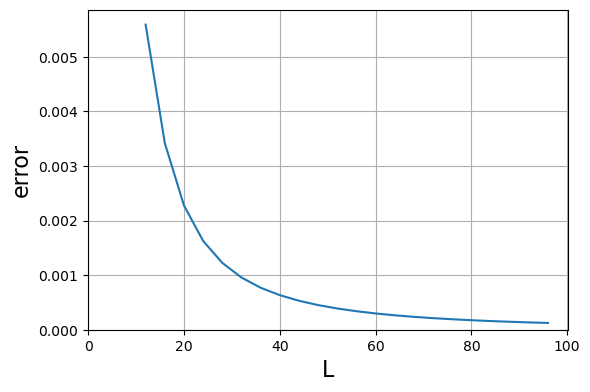

In [4]:
# For fixed A = B = C = L/4, the error decreases
Ls = list(range(12, 100, 4))
err1s = []
err2s = []
for L in Ls:
  t = L//4
  _, err1, err2 = test(t, t, t, t)
  err1s.append(err1)
  err2s.append(err2)

plt.figure(figsize=(6, 4))
plt.gcf().add_axes([0.15, 0.15, 0.8, 0.8])
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 
plt.plot(Ls, err1s)
# plt.plot(Ls, err2s) # indistinguishable to err1s from the plot
plt.xlim(0, None)
plt.ylim(0, None)
plt.xlabel('L', fontsize=16)
plt.ylabel('error', fontsize=16)
plt.grid()
plt.tight_layout()
plt.savefig('plot-error-free-fermion.pdf', dpi=300)

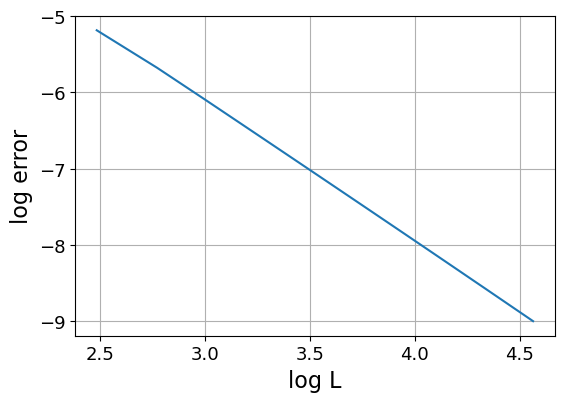

In [10]:
plt.figure(figsize=(6, 4))
plt.gcf().add_axes([0.15, 0.15, 0.8, 0.8])
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 
plt.plot(np.log(Ls), np.log(err1s))
plt.xlabel('log L', fontsize=16)
plt.ylabel('log error', fontsize=16)
plt.grid()
plt.tight_layout()
plt.savefig('plot-error-free-fermion-log.pdf', dpi=300)